In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

In [13]:
def recurrent_formula(x, dx, v_cur, v_prev, p):
        t1 = (x * x / (dx * dx) + x / (2*dx))
        t2 = (-2 * v_cur + v_prev) / (dx * dx)
        t3 = x * v_prev / (2 * dx)
        t4 = (x * x - p * p) * v_cur
        return ((-1) * x * x * t2 + t3 - t4) / t1

In [14]:
# DEBUG CELL
# _x = np.linspace(0, 10, 100)
# v_arr = [0, 0.1]
# for i in range(2, len(_x)):
#     v_arr.append(recurrent_formula(_x[i - 1], 0.1, v_arr[i - 1], v_arr[i - 2], 0.5))
#     print(v_arr[-1])
#     if input():
#         break

In [15]:
def calc_bessel_equation(domain, h, start_conditions, p_values, rec_form=recurrent_formula):
    """
    domain: [a, b]
    start_conditions: v(a)=v_a, v`(a)=dv_a
    p_values: list[len: 4]
    """
    
    A, B = domain
    N = round((B - A) / h)
    x_axis = np.linspace(A, B, N)
    v2p_axies = []
    for i in range(len(p_values)):
        v2p_axies.append([start_conditions[0], start_conditions[0] + start_conditions[1] * h])
    for i in range(2, N):
        for j in range(len(p_values)): 
            v2p_axies[j].append(
                rec_form(x_axis[i - 1], h, v2p_axies[j][i - 1], v2p_axies[j][i - 2], p_values[j])
            )
    # print(x_axis)
    return (x_axis, v2p_axies)

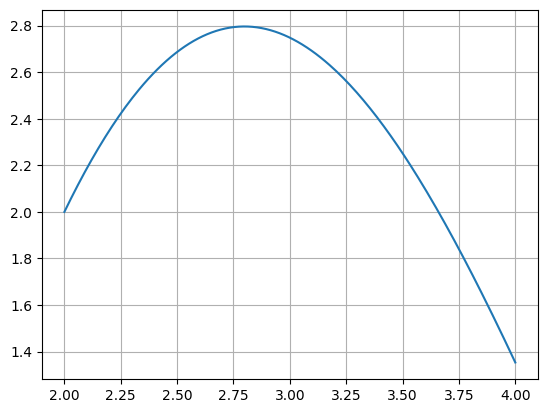

In [16]:
res = calc_bessel_equation((2, 4), 0.01, [2, 2], [1, 2, 3, 4])
x, v = res[0], res[1][0]
# print(len(x))
plt.plot(x, v)
plt.grid()
plt.show()
# print(v)

In [17]:
def recurrent_formula_singular(x, dx, v_cur, v_prev, y):
    t1 = (x / (dx * dx) + y / (2 * dx))
    t2 = x * (2 * v_cur - v_prev) / (dx * dx)
    t3 = y * v_prev / (2 * dx)
    return (t2 + t3 - x * v_cur) / t1


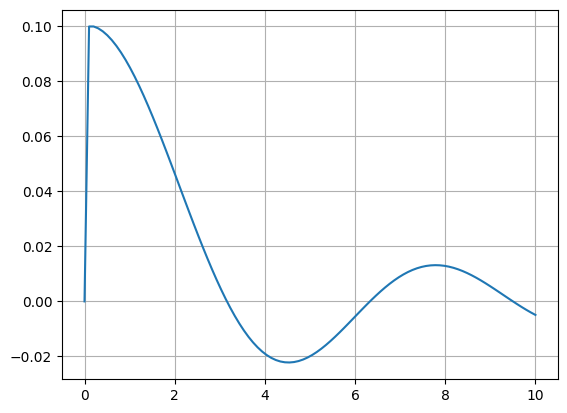

In [18]:
res = calc_bessel_equation((0, 10), 0.1, [0, 1], [0.5 * 2 + 1], rec_form=recurrent_formula_singular)
x, v = res[0], res[1][0]
# print(len(x))
plt.plot(x, v)
plt.grid()
plt.show()
# print(v)

[0.25, 0.5, 0.75, 1.0]
0.11300300429647818 6.6667101812090355


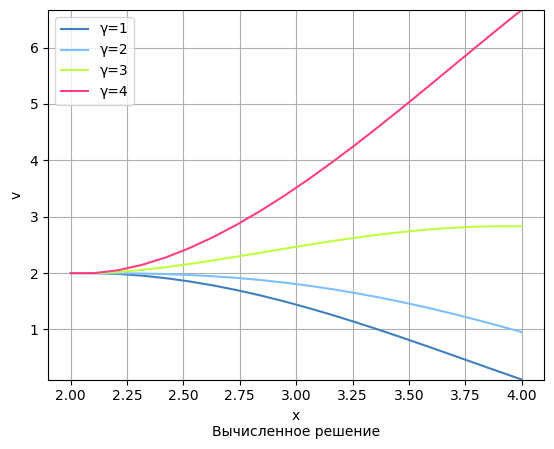

In [19]:
# var 6
a, b = 2, 4
start_values = [2, 0]
p_values = [1, 2, 3, 4]

colors = list(map(float, np.linspace(0, 1, len(p_values) + 1)))[1:]
print(colors)
solve = calc_bessel_equation((a, b), 0.1, start_values, p_values)

def draw(res, label='Вычисленное решение', ybounds=None):
    x = res[0]
    v_vals = res[1]
    # print(res)
    for i in range(len(v_vals)):
        plt.plot(x, v_vals[i], c=(colors[i], 
        colors[(i + 1) % len(p_values)], colors[(i + 2) % len(p_values)]), label=f'γ={p_values[i]}')
    global_ymin = min(list(map(min, v_vals)))
    global_ymax = max(list(map(max, v_vals)))
    plt.ylim((global_ymin, global_ymax))
    print(global_ymin, global_ymax)
    plt.xlabel(f'x\n{label}')
    plt.ylabel('v')
    plt.grid()
    plt.ylim(ybounds)
    plt.legend()
    plt.show()

draw(solve)


3.967299032682602e-05 0.7651976865579666


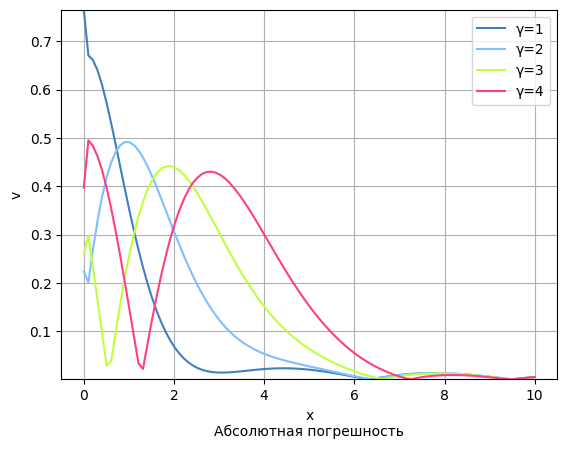

In [20]:
def draw_abs_diff(res):
    x = res[0]
    abs_diff_v = res[1]
    for i in range(len(v_vals)):
        plt.plot(x, v_vals[i], c=(colors[i + 2], 
        colors[(i + 1) % len(p_values)], colors[(i) % len(p_values)]), label=f'p={p_values[i]}')
    # global_ymin = min(list(map(min, v_vals)))
    # global_ymax = max(list(map(max, v_vals)))
    plt.ylim((global_ymin, global_ymax))
    print(global_ymin, global_ymax)
    plt.xlabel('x\nИстинное решение')
    plt.ylabel('v_true')
    plt.grid()
    plt.legend()
    plt.show()

true_values = np.array([list(map(lambda x: sps.jv(x, p), res[0])) for p in p_values])

diff = abs(true_values - np.array(res[1]))


draw((res[0], diff), label='Абсолютная погрешность')

C:\Users\games\AppData\Local\Temp\ipykernel_12028\2830724185.py:1: RuntimeWarning: divide by zero encountered in divide
  lcl_diff = abs((true_values - np.array(res[1])) / np.array(res[1]))


ValueError: Axis limits cannot be NaN or Inf

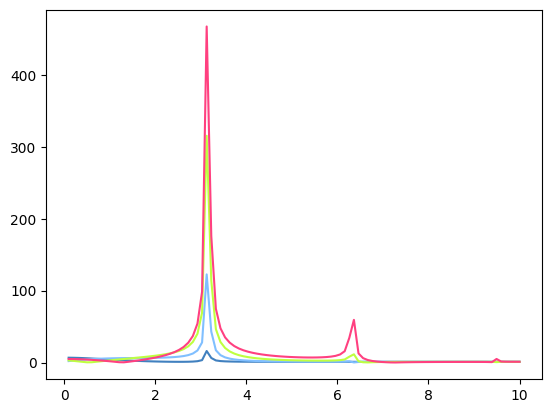

In [21]:
lcl_diff = abs((true_values - np.array(res[1])) / np.array(res[1]))
draw((res[0], lcl_diff), label='Относительная погрешность', ybounds=(0, 1))

[0.25, 0.5, 0.75, 1.0]
-0.12582374598404986 2


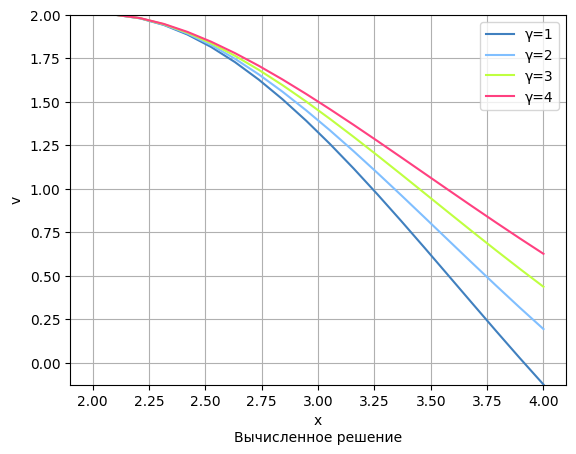

3.967299032682602e-05 0.7651976865579666


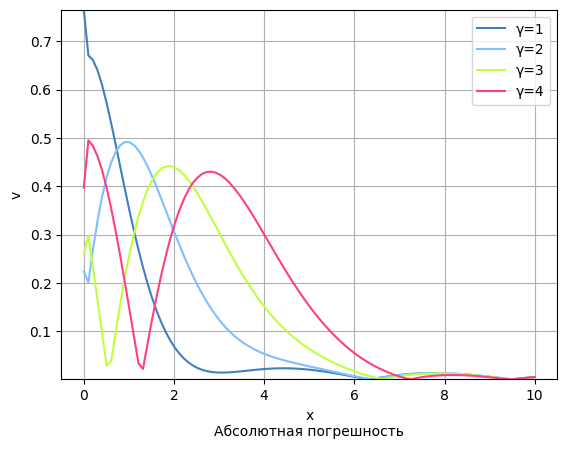

In [22]:
# var 6
a, b = 2, 4
start_values = [2, 0]
p_values = [1, 2, 3, 4]

colors = list(map(float, np.linspace(0, 1, len(p_values) + 1)))[1:]
print(colors)
solve = calc_bessel_equation((a, b), 0.1, start_values, p_values, rec_form=recurrent_formula_singular)
draw(solve)
true_values = np.array([list(map(lambda x: sps.jv(x, p), res[0])) for p in p_values])

diff = abs(true_values - np.array(res[1]))


draw((res[0], diff), label='Абсолютная погрешность')
